### Codio Activity 10.5: ACF and PACF Plots for ARMA Models

**Expected Time: 60 Minutes**

**Total Points: 70**

This assignment focuses on using the autocorrelation and partial autocorrelation plots to determine parameters for stationary data.  In general, you will first determine the stationarity of a time series using the Dickey Fuller test (or eyeballing it) and then examine the autocorrelation and partial autocorrelation to identify the parameters for each term.

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)
- [Problem 7](#Problem-7)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
import warnings

In [2]:
warnings.filterwarnings('ignore')

### The Data

Two datasets are used to examine stationarity and autoregression and moving average components for ARMA models.  The first is the recruits data, encountered earlier.  The second is a series of Quarterly GNP data from the United States from 1947 through 2002. In the first you predict the number of recruits and the second your target is the difference of the logarithm of the GNP. 

In [3]:
recruits = pd.read_csv('data/recruitment.csv', index_col=0)

In [4]:
recruits.head()

,value
1950-01-01,68.63
1950-02-01,68.63
1950-03-01,68.63
1950-04-01,68.63
1950-05-01,68.63


Text(0.5, 1.0, 'Recruits Data')

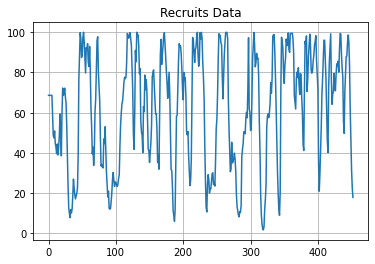

In [5]:
plt.plot(recruits.values)
plt.grid()
plt.title('Recruits Data')

[Back to top](#-Index)

### Problem 1

#### Is it Stationary? 

**10 Points**

As discussed, our ARMA models are only applicable for stationary data.  Use the `adfuller` function to determine if the recruits data is stationary at the 0.05 level.  Assign your answer as a string to `ans1` below.  

In [6]:
# check if stationary
results = adfuller(recruits)
results
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
        print('\t%s: %.3f' % (key, value), 'stationary' if (results[0] < value) else 'not stationary')

ADF Statistic: -6.239970
p-value: 0.000000
Critical Values:
	1%: -3.445 stationary
	5%: -2.868 stationary
	10%: -2.570 stationary


In [7]:
### GRADED

ans1 = ''

# YOUR CODE HERE
#raise NotImplementedError()
ans1 = 'yes'

# Answer check
print(ans1)
print(type(ans1))

yes
<class 'str'>


[Back to top](#-Index)

### Problem 2

#### Building train and test set

**10 Points**

Now, we use the familiar `train_test_split` and set `shuffle = False` to create a temporal train and test set.  Leave all arguments to default except `shuffle`.  Assign your results as `y_hist` and `y_future` below. 

In [8]:
### GRADED

y_hist, y_future = '', ''

# YOUR CODE HERE
#raise NotImplementedError()
y_hist, y_future = train_test_split(recruits, shuffle = False)

# Answer check
print("History\n=========")
print(y_hist.tail())
print("Future\n==========")
print(y_future.head())

History
               value
1977-11-01  98.74000
1977-12-01  98.88000
1978-01-01  90.41001
1978-02-01  77.86000
1978-03-01  61.48000
Future
            value
1978-04-01  47.66
1978-05-01  30.74
1978-06-01  20.11
1978-07-01  12.08
1978-08-01   8.97


[Back to top](#-Index)

### Problem 3

#### Examining acf and pacf

**10 Points**

Below, the ACF and PACF plots are shown.  While the ACF plot isn't incredibly helpful, the PACF may suggest using a value of `p = 1` in an ARMA model.  As such, create and fit an ARIMA model with `p = 1` and `q = 1`.  Assign your fit model as `arma` below.

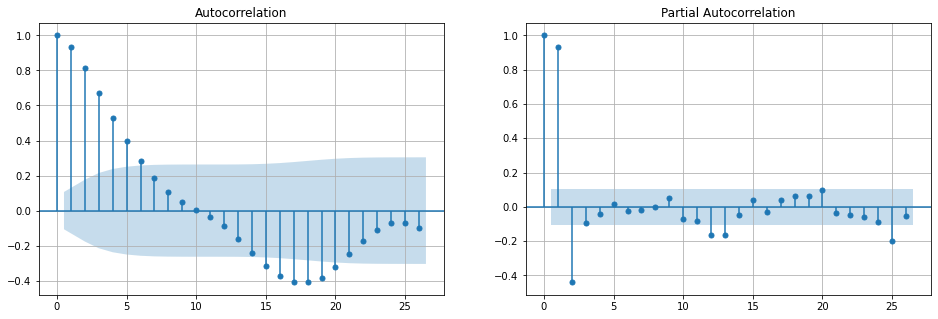

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(y_hist, ax = ax[0])
ax[0].grid()
plot_pacf(y_hist, ax = ax[1], method = 'ywm')
ax[1].grid()

In [10]:
y_hist.index = pd.to_datetime(y_hist.index)

In [11]:
y_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 339 entries, 1950-01-01 to 1978-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   339 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [12]:
### GRADED

arma = ''

# YOUR CODE HERE
#raise NotImplementedError()
p=1
q=0
arma = ARIMA(y_hist, order=(p, 0, q)).fit()

# Answer check
print(arma)

[Back to top](#-Index)

### Problem 4

#### Making Predictions

**10 Points**

Use the `arma` object to make predictions for the training data.  Assign these results as `hist_preds` below.  Uncomment the code to view a plot of the results against the original series. 

1977-11-01    95.219593
1977-12-01    95.973813
1978-01-01    96.104173
1978-02-01    88.217460
1978-03-01    76.531694
Freq: MS, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'Result of ARMA Model')

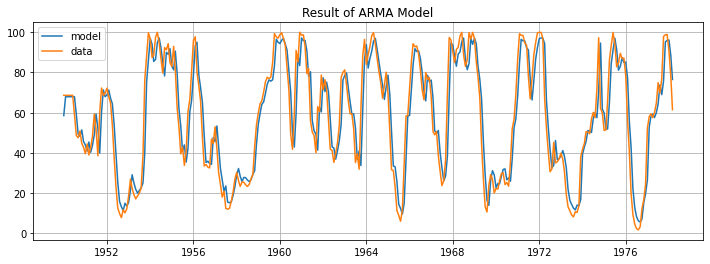

In [13]:
### GRADED

hist_preds = ''

# YOUR CODE HERE
#raise NotImplementedError()
hist_preds = arma.predict()


# Answer check
print(hist_preds.tail())
plt.figure(figsize = (12, 4))
plt.plot(hist_preds, label = 'model')
plt.plot(y_hist, label = 'data')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model')

[Back to top](#-Index)

### Problem 5

#### Forecasting with the ARMA model

**10 Points**

Finally, to use the forecasting capabilities of the model, pass the number of steps to forecast in the future.  Assign the forecast into the future to match up with `y_future` values as `future_preds` below.  

In [14]:
y_future.index = pd.to_datetime(y_future.index)

In [15]:
### GRADED

future_preds = ''

# YOUR CODE HERE
#raise NotImplementedError()
future_preds = arma.forecast(len(y_future))

# Answer check
print(future_preds.tail())
print(y_future.tail())

1987-05-01    58.572316
1987-06-01    58.572238
1987-07-01    58.572165
1987-08-01    58.572097
1987-09-01    58.572034
Freq: MS, Name: predicted_mean, dtype: float64
            value
1987-05-01  61.42
1987-06-01  47.47
1987-07-01  31.81
1987-08-01  22.95
1987-09-01  17.87


[Back to top](#-Index)

### Problem 6

#### The GNP series

**10 Points**

Below, the `gnp` data is loaded and displayed.  This data is transformed according to the first difference of the logarithm so as to form a stationary series.  Then, the ACF and PACF plots are shown on the stationary series.  These suggest that an AR(2) and MA(2) model might be appropriate.  Build an `ARIMA` model on `y` and predict as `preds`.  Uncomment the code to visualize the predictions.

In [16]:
gnp = pd.read_csv('data/gnp.csv', index_col=0)
gnp.index = pd.Index(pd.date_range("1947-Q1", "2002-Q4", freq = "Q"))
gnp.head()

,value
1947-03-31,1488.9
1947-06-30,1496.9
1947-09-30,1500.5
1947-12-31,1524.3
1948-03-31,1546.6


<AxesSubplot:>

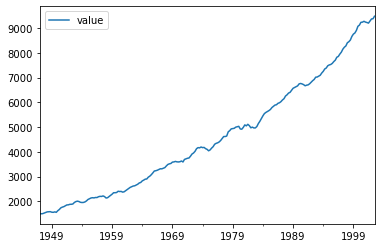

In [17]:
gnp.plot()

In [18]:
y = np.log(gnp).diff().dropna()

In [19]:
#note the stationarity
adfuller(y)

(-10.29196775882278,
 3.550732270832635e-18,
 0,
 221,
 {'1%': -3.4602906385073884,
  '5%': -2.874708679520702,
  '10%': -2.573788599127782},
 -1350.8710047523716)

In [20]:
# check if stationary
results = adfuller(y)
results
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
        print('\t%s: %.3f' % (key, value), 'stationary' if (results[0] < value) else 'not stationary')

ADF Statistic: -10.291968
p-value: 0.000000
Critical Values:
	1%: -3.460 stationary
	5%: -2.875 stationary
	10%: -2.574 stationary


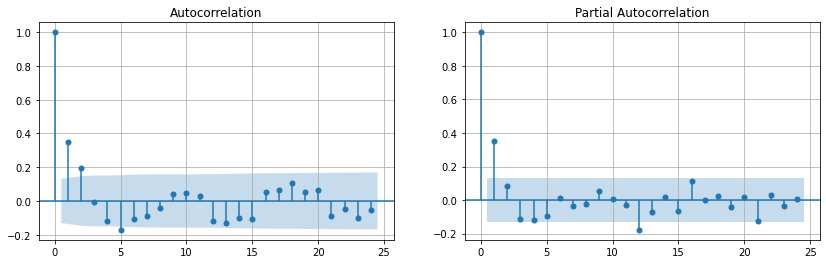

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
plot_acf(y, ax = ax[0]);
ax[0].grid()
plot_pacf(y, ax = ax[1])
ax[1].grid()

Text(0.5, 1.0, 'Result of ARMA Model')

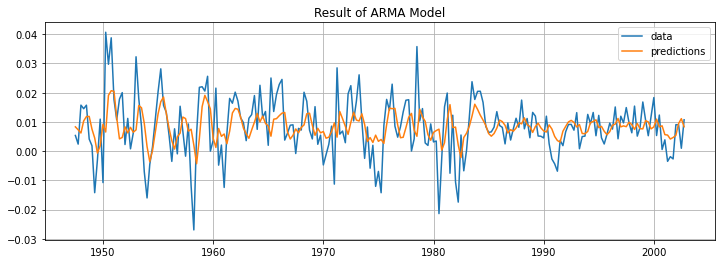

In [22]:
### GRADED

arma2 = ''
preds = ''

# YOUR CODE HERE
#raise NotImplementedError()
p=2
q=2
arma2 = ARIMA(y, order=(p, 0, q)).fit()
preds = arma2.predict()


# Answer check
plt.figure(figsize = (12, 4))
plt.plot(y, label = 'data')
plt.plot(preds, label = 'predictions')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model')

[Back to top](#-Index)

### Problem 7

#### Errors and Autocorrelation

**10 Points**

Below, subtract the predictions from the actual series.  Determine the stationarity of the results by examining the autocorrelation plot of the residuals.  Is there structure remaining in the series based on this?  Assign your answer as a string to `ans7` below -- 'yes' or 'no'.

In [23]:
preds = pd.DataFrame(preds)
preds.columns = ['value']

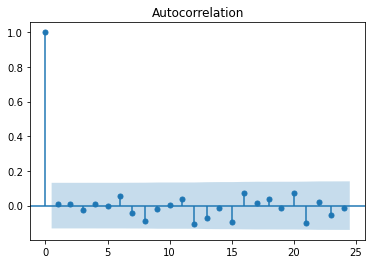

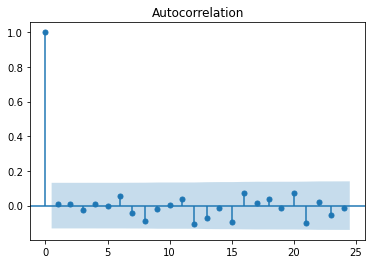

In [24]:
### GRADED

resids = ''
ans7 = ''

# YOUR CODE HERE
#raise NotImplementedError()
resids = y - preds
ans7 = 'no'

plot_acf(resids)

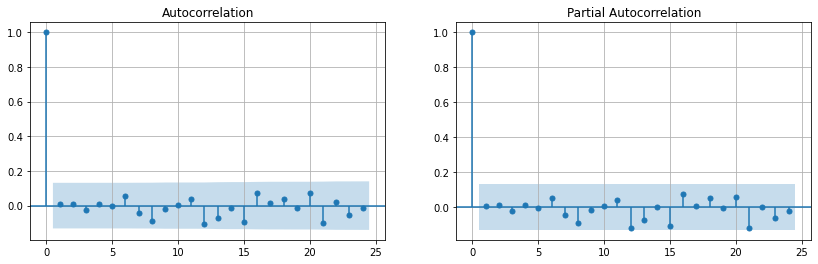

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
plot_acf(resids, ax = ax[0]);
ax[0].grid()
plot_pacf(resids, ax = ax[1])
ax[1].grid()